/var/folders/cc/pdp9b2qx00dfkpyg21frcmdsjksps5/T/ipykernel_49626/2102008850.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), horizontalalignment='center')
/var/folders/cc/pdp9b2qx00dfkpyg21frcmdsjksps5/T/ipykernel_49626/2102008850.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), horizontalalignment='center')
/var/folders/cc/pdp9b2qx00dfkpyg21frcmdsjksps5/T/ipykernel_49626/2102008850.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), horizontalalignment='center')


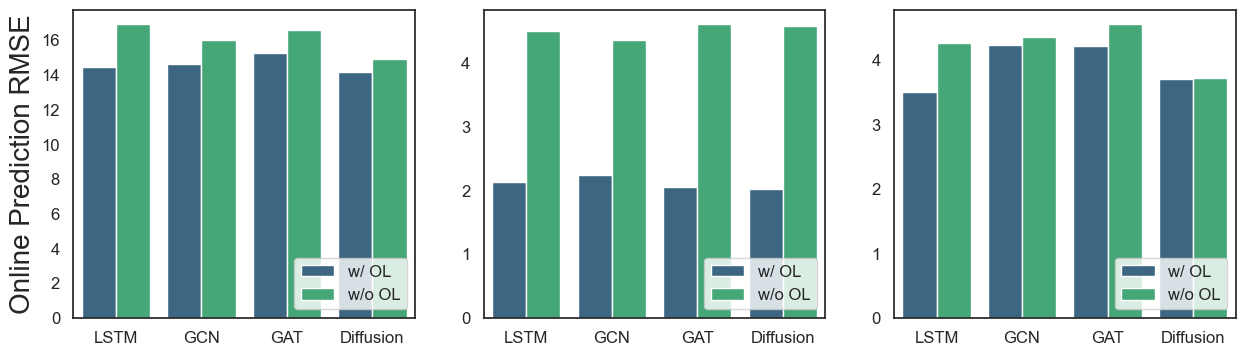

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = {
    "Models": ["LSTM", "LSTM w/o OL", "GCN", "GCN w/o OL", "GAT", "GAT w/o OL", "Diffusion", "Diffusion w/o OL"],
    "CROSSROAD": [14.44, 16.91, 14.61, 16.04, 15.28, 16.60, 14.16, 14.93],
    "MAZE": [2.14, 4.50, 2.25, 4.36, 2.06, 4.61, 2.03, 4.59],
    "TRAINSTATION": [3.50, 4.27, 4.23, 4.35, 4.21, 4.55, 3.71, 3.72]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars="Models", var_name="Environment", value_name="Error")

# Add a new column to distinguish between OL and w/o OL
df_melted['OL'] = df_melted['Models'].apply(lambda x: 'w/ OL' if 'w/o OL' not in x else 'w/o OL')
df_melted['Model'] = df_melted['Models'].apply(lambda x: x.replace(' w/o OL', ''))

# Set the plot style
sns.set(style="white")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot for each environment
environments = ["CROSSROAD", "MAZE", "TRAINSTATION"]

for i, env in enumerate(environments):
    sns.barplot(
        ax=axes[i], 
        data=df_melted[df_melted['Environment'] == env], 
        x="Model", 
        y="Error", 
        hue="OL", 
        palette="viridis"
    )
    # axes[i].set_title(f'{env}', fontsize=16)
    axes[i].set_xlabel(None, fontsize=14)
    if i == 0:
        axes[i].set_ylabel('Online Prediction RMSE', fontsize=20)
    else:
        axes[i].set_ylabel(None)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), horizontalalignment='center')
    # ticks
    axes[i].tick_params(axis='both', labelsize=12)
    # set location lower right
    axes[i].legend(title=None, fontsize=12, loc='lower right')

# Adjust layout
# plt.tight_layout()
# save the plot as pdf
plt.savefig('./fig/online_learning_bar.pdf', bbox_inches='tight')
# Display the plot
plt.show()


In [35]:
df_melted['Model']

0          LSTM
1          LSTM
2           GCN
3           GCN
4           GAT
5           GAT
6     Diffusion
7     Diffusion
8          LSTM
9          LSTM
10          GCN
11          GCN
12          GAT
13          GAT
14    Diffusion
15    Diffusion
16         LSTM
17         LSTM
18          GCN
19          GCN
20          GAT
21          GAT
22    Diffusion
23    Diffusion
Name: Model, dtype: object